In [ ]:
import sys
print(sys.executable)

# !{sys.executable} -m pip install flash-attn==2.8.0.post2

In [ ]:
import torch
print("CUDA available?", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
print("CUDA device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "N/A")


In [1]:
# Cell 1: Setup and Global Model Loading
print("Starting cell 1")
# Standard imports for model loading and type hinting
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch # Often used for model operations (e.g., moving to GPU, data types)
from typing import Any, Dict

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

if device.type == 'cuda':
    print(f"CUDA device name: {torch.cuda.get_device_name(0)}") # Prints GPU name (e.g., NVIDIA A100)


# Define the path to your model
# MODEL_NAME = "models/Meta-Llama-3-8B-Instruct"
MODEL_NAME = "hugging-quants/Meta-Llama-3.1-8B-Instruct-GPTQ-INT4"

# --- Global Model Loading Logic ---
# This check ensures the model is loaded only once per kernel session.
# If you restart your Jupyter kernel, this cell will execute and load the model again.
if 'global_tokenizer' not in globals():
    print(f"Loading tokenizer and model '{MODEL_NAME}' for the first time...")
    
    # Load tokenizer
    global_tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=False)
    
    # Load model. 
    # Also, move to GPU if available.
    global_model = AutoModelForCausalLM.from_pretrained(MODEL_NAME)
    if torch.cuda.is_available():
        print("CUDA available")
        global_model.to('cuda')

    print("Model loaded.")
else:
    print("Model already loaded. Reusing existing instances.")

# Optional: Print basic info to confirm
print(f"Tokenizer: {type(global_tokenizer)}")
print(f"Model: {type(global_model)}")

Starting cell 1
Using device: cuda
CUDA device name: NVIDIA A40
Loading tokenizer and model 'hugging-quants/Meta-Llama-3.1-8B-Instruct-GPTQ-INT4' for the first time...


/home/jovyan/miniconda3/envs/myenv/lib/python3.11/site-packages/auto_gptq/nn_modules/triton_utils/kernels.py:410: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd
/home/jovyan/miniconda3/envs/myenv/lib/python3.11/site-packages/auto_gptq/nn_modules/triton_utils/kernels.py:418: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  @custom_bwd
/home/jovyan/miniconda3/envs/myenv/lib/python3.11/site-packages/auto_gptq/nn_modules/triton_utils/kernels.py:461: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=torch.float16)
CUDA extension not installed.
CUDA extension not installed.
`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of the model checkpoint at hugging-quants/Meta-Llama-3.1-8B-Instruct-GPTQ-INT4 were not used when initializing LlamaForCausalLM: ['model.layers.0.mlp.down_proj.bias', 'model.layers.0.mlp.gate_proj.bias', 'model.layers.0.mlp.up_proj.bias', 'model.layers.0.self_attn.k_proj.bias', 'model.layers.0.self_attn.o_proj.bias', 'model.layers.0.self_attn.q_proj.bias', 'model.layers.0.self_attn.v_proj.bias', 'model.layers.1.mlp.down_proj.bias', 'model.layers.1.mlp.gate_proj.bias', 'model.layers.1.mlp.up_proj.bias', 'model.layers.1.self_attn.k_proj.bias', 'model.layers.1.self_attn.o_proj.bias', 'model.layers.1.self_attn.q_proj.bias', 'model.layers.1.self_attn.v_proj.bias', 'model.layers.10.mlp.down_proj.bias', 'model.layers.10.mlp.gate_proj.bias', 'model.layers.10.mlp.up_proj.bias', 'model.layers.10.self_attn.k_proj.bias', 'model.layers.10.self_attn.o_proj.bias', 'model.layers.10.self_attn.q_proj.bias', 'model.layers.10.self_attn.v_proj.bias', 'model.layers.11.mlp.down_proj.bias', 'mode

CUDA available
Model loaded.
Tokenizer: <class 'transformers.tokenization_utils_fast.PreTrainedTokenizerFast'>
Model: <class 'transformers.models.llama.modeling_llama.LlamaForCausalLM'>


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Starting this cell!


[autoreload of agents.PlanningAgent failed: Traceback (most recent call last):
  File "/home/jovyan/miniconda3/envs/myenv/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 283, in check
    superreload(m, reload, self.old_objects)
  File "/home/jovyan/miniconda3/envs/myenv/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 483, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/home/jovyan/miniconda3/envs/myenv/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 936, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1074, in get_code
  File "<frozen importlib._bootstrap_external>", line 1004, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/jovyan/agents/PlanningAgent.py", line 138
    def

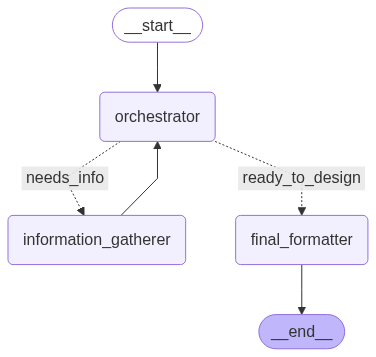

Routed back to the Orchestrator Note

Here is the state I currently received as input!!

{'input': 'I need to generate a storyboard (images and text needed, remmeber to find and extract videos) \n    about the Singapore SG60 National Day Parade, and try to encourage some nationalism and patriotism', 'knowledge': [], 'needs': [], 'search_history': [], 'status': 'needs_info'}
Knowledge doesn't exist

Hence the input is I need to generate a storyboard (images and text needed, remmeber to find and extract videos) 
    about the Singapore SG60 National Day Parade, and try to encourage some nationalism and patriotism
Devising plan...

Search history is []
--------------------STARTING ORCHESTRATOR DECISION-------------------



Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Rationale: The query lacks specific details about the event, such as key visuals, desired tone, and target audience, which are crucial for designing a storyboard. 
Status: needs_info
Needs: ['key visuals', 'desired tone', 'target audience']
===========================END OF RESPONSE FOR ORCHESTRATOR========================


Result status is : needs_info

Rationale behind that is : The query lacks specific details about the event, such as key visuals, desired tone, and target audience, which are crucial for designing a storyboard. 

Needs  is : ['key visuals', 'desired tone', 'target audience']

Current Search History is []

📥 [information_gatherer] received state: {'input': 'I need to generate a storyboard (images and text needed, remmeber to find and extract videos) \n    about the Singapore SG60 National Day Parade, and try to encourage some nationalism and patriotism', 'knowledge': [], 'reason_for_retry': 'The query lacks specific details about the event, such as key visuals, desir

[youtube] 1m8_sexszKg: Downloading m3u8 information
[info] Testing format 270
[info] 1m8_sexszKg: Downloading 1 format(s): 18
[download] Destination: videos//1m8_sexszKg.mp4
[download] 100% of  299.57KiB in 00:00:00 at 583.79KiB/s 
['videos//1m8_sexszKg.mp4']
Invoking: `analyze_and_extract` with `{'video_path': 'videos//1m8_sexszKg.mp4'}`


🔄 Re-encoding videos//1m8_sexszKg.mp4 → .cache/1m8_sexszKg.h264.mp4
Video successfully re-encoded!
The duration of the video is 9.933333333333334 seconds
video input: torch.Size([18, 3, 224, 392])
num of video tokens: 1008
Qwen-VL says: 00:00:02 - Fireworks explode in the sky above Singapore's skyline.
00:00:15 - A helicopter flies over the Singapore skyline.
00:00:28 - A Ferris wheel rotates against the backdrop of the Singapore skyline.
00:00:40 - A person waves a Singapore flag from a balcony overlooking the city.
00:00:52 - A parade of people marching down a street, carrying flags and banners.
Timestamp : 00:00:02 
✅ Saved frame at 00:00:02  → f

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Rationale: The query lacks specific information about the desired tone, target audience, and key visuals for the storyboard, which are crucial for designing a coherent storyboard. 
Status: needs_info
Needs: ['family-friendly shots', 'eco initiatives', 'contingency planning']
===========================END OF RESPONSE FOR ORCHESTRATOR========================


Result status is : needs_info

Rationale behind that is : The query lacks specific information about the desired tone, target audience, and key visuals for the storyboard, which are crucial for designing a coherent storyboard. 

Needs  is : ['family-friendly shots', 'eco initiatives', 'contingency planning']

Current Search History is ['key visuals', 'desired tone', 'target audience']

📥 [information_gatherer] received state: {'input': 'I need to generate a storyboard (images and text needed, remmeber to find and extract videos) \n    about the Singapore SG60 National Day Parade, and try to encourage some nationalism and patriotis

[youtube] XE6DYxBRclI: Downloading m3u8 information
[info] Testing format 625
[info] XE6DYxBRclI: Downloading 1 format(s): 18
[download] videos//XE6DYxBRclI.mp4 has already been downloaded
[download] 100% of  862.23KiB
['videos//XE6DYxBRclI.mp4']
Invoking: `search_and_download_yt_videos` with `{'query': 'Singapore SG60 National Day Parade eco initiatives', 'num_videos': 1}`


Agent decided to search for 1 videos with query: 'Singapore SG60 National Day Parade eco initiatives'
[youtube] Extracting URL: https://www.youtube.com/watch?v=FTXLAbDApdk
[youtube] FTXLAbDApdk: Downloading webpage
[youtube] FTXLAbDApdk: Downloading tv client config
[youtube] FTXLAbDApdk: Downloading player 093288cd-player_es5_vflset_en_US_base
[youtube] FTXLAbDApdk: Downloading tv player API JSON
[youtube] FTXLAbDApdk: Downloading ios player API JSON


[youtube] FTXLAbDApdk: Downloading m3u8 information
[info] Testing format 614
[info] FTXLAbDApdk: Downloading 1 format(s): 18
[download] videos//FTXLAbDApdk.mp4 has already been downloaded
[download] 100% of    1.20MiB
['videos//FTXLAbDApdk.mp4']
Invoking: `search_and_download_yt_videos` with `{'query': 'Singapore SG60 National Day Parade contingency planning', 'num_videos': 1}`


Agent decided to search for 1 videos with query: 'Singapore SG60 National Day Parade contingency planning'
[youtube] Extracting URL: https://www.youtube.com/watch?v=9evNwCDJ9WI
[youtube] 9evNwCDJ9WI: Downloading webpage
[youtube] 9evNwCDJ9WI: Downloading tv client config
[youtube] 9evNwCDJ9WI: Downloading tv player API JSON
[youtube] 9evNwCDJ9WI: Downloading ios player API JSON


[youtube] 9evNwCDJ9WI: Downloading m3u8 information
[info] Testing format 616
[info] 9evNwCDJ9WI: Downloading 1 format(s): 18
[download] videos//9evNwCDJ9WI.mp4 has already been downloaded
[download] 100% of    6.73MiB
['videos//9evNwCDJ9WI.mp4']
Invoking: `analyze_and_extract` with `{'video_path': 'videos//XE6DYxBRclI.mp4'}`


The duration of the video is 15.28 seconds
video input: torch.Size([30, 3, 308, 168])
num of video tokens: 990
Qwen-VL says: 00:00:00 - A person in a blue hoodie and white pants is running towards a train on a platform, appearing to be late.
00:00:15 - The same person is now standing on the platform, holding a football and looking around, possibly waiting for someone or something.
00:00:25 - A different person, dressed in a black suit and white shirt, is seen walking past the camera while juggling a hula hoop.
00:00:35 - The person in the blue hoodie is now holding a backpack and appears to be looking at their phone, possibly checking the time or messages.
00:00

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


In [ ]:
%load_ext autoreload
%autoreload 2

import json, pprint, os, sys
from IPython.display import Image, display
from datetime import datetime
from agents.orchestrator import orchestrator
from agents.information_gatherer import information_gatherer
from agents.reflector import reflector
from agents.final_formatter import final_formatter
from graph import build_graph
from agents.BaseAgent import AgentState
print("Starting this cell!")

pp = pprint.PrettyPrinter(indent=2, width=100)

initial_state = {
    "input": """I need to generate a storyboard (images and text needed, remmeber to find and extract videos) 
    about the Singapore SG60 National Day Parade, and try to encourage some nationalism and patriotism""",   # your top-level query
    "plan": None,
    "knowledge": [],
    "draft_story": None,
    "reflection": None,
    "final_output": None,
    "status": "needs_info", 
    "candidates": None,
    "needs": [],
    "search_history": []
}

# user_query =  """I need to generate a storyboard (images and text needed, remmeber to find and extract videos) 
#     about the Singapore SG60 National Day Parade, and try to encourage some nationalism and patriotism"""
# initial_state = AgentState(user_query=user_query)
# print(initial_state)

#Build Graph
orch_node = lambda initial_state: orchestrator(global_model, global_tokenizer, initial_state)
final_node = lambda initial_state: final_formatter(global_model, global_tokenizer, initial_state)
# print(f"\n\n Orch node is of type {type(orch_node)}")
app = build_graph(
    orchestrator_node=orch_node,
    information_gatherer_node=information_gatherer,
    final_formatter_node=final_node,
)

# show a diagram if available
try:
    png_bytes = app.get_graph().draw_mermaid_png()
    display(Image(data=png_bytes))
except Exception as e:
    print("[note] couldn't render mermaid png:", e)

# pp.pprint(initial_state)
final_state = app.invoke(initial_state)
print("Final state:", final_state)


# # --- 3) utility: pretty-print state diffs each hop ---
# def run_once(app, initial_state: dict):
#     print("=== RUN @", datetime.now().strftime("%H:%M:%S"), "===")
#     print("initial_state:")
#     pp.pprint(initial_state)
#     print("\n--- streaming updates ---")
#     try:
#         for update in app.stream(initial_state, stream_mode="updates"):
#             # each `update` is a dict of state writes at that step
#             print("Update!\n")
#             print(json.dumps(update, indent=2))
#     except TypeError:
#         # some langgraph versions expect stream_mode=["updates","values"]
#         for update in app.stream(initial_state, stream_mode=["updates","values"]):
#             print(json.dumps(update, indent=2))

#     print("\n--- final values ---")
#     final = app.invoke(initial_state)
#     pp.pprint(final)
#     return final


# # --- 4) example: minimal state to kick off the graph ---


# final_state = run_once(app, initial_state)


In [ ]:
# What AgentState are YOU using here?
from agents.BaseAgent import AgentState as NB_AgentState  # or just use AgentState if in the same cell
print("NB AgentState:", NB_AgentState, NB_AgentState.__module__)

# What AgentState is PlanningAgent using?
import agents.PlanningAgent as PA
print("PA.AgentState:", PA.AgentState, PA.AgentState.__module__)

# Are they literally the same class?
import agents.BaseAgent as SS  # <-- replace with wherever your canonical AgentState is
print("PlanningAgent uses same AgentState as SS?", PA.AgentState is SS.AgentState)


In [ ]:
# To display the eventual storyboard as an output

from IPython.display import display, HTML

def display_storyboard(storyboard):
    """
    Given a storyboard list of dicts with keys 'image_path' and 'caption',
    displays each image with its caption underneath in a Jupyter notebook.
    """
    for scene in storyboard:
        display(HTML(f"""
        <figure style="max-width:600px; margin: 20px 0;">
            <img src="{scene['image_path']}" 
                 style="width:100%; height:auto; border:1px solid #ccc; border-radius:4px;" />
            <figcaption style="text-align:center; font-style:italic; color:#555; margin-top:5px;">
                {scene['caption']}
            </figcaption>
        </figure>
        """))
display_storyboard(final_state)
        
        



In [ ]:
import os, json
from IPython.display import HTML, display

def _to_served_src(p: str) -> str:
    # debug: print before and after
    # print(f'Before: {p}')
    # strip stray spaces before extension
    p = p.replace(".jpg", " .jpg").replace(".png", " .png")
    # remove any leading /home/jovyan/ if it exists
    p = p.replace("/home/jovyan/", "")
    # print(f'After: {p}')
    # return relative path (browser will look under Jupyter's served root)
    return p


def display_storyboard(final_state):
    # 1) prefer final_output.storyboard; fallback to knowledge
    items = []
    fo = final_state.get("final_output")
    if isinstance(fo, str) and fo.strip():
        try:
            obj = json.loads(fo)
            for s in obj.get("storyboard", []) or []:
                items.append({
                    "image_path": s.get("image_path", ""),
                    "caption": s.get("frame_caption") or s.get("caption") or ""
                })
        except Exception:
            pass
    if not items:
        for k in final_state.get("knowledge", []) or []:
            items.append({"image_path": k.get("image_path",""), "caption": k.get("caption","")})

    # 2) render
    parts = []
    for i, it in enumerate(items, 1):
        raw_path = it["image_path"]
        served = _to_served_src(raw_path)
        # optional: warn if file missing
        fs_path = served.removeprefix("/files")
        if not os.path.exists(fs_path):
            parts.append(f"<p style='color:#c00'>[Missing file] {fs_path}</p>")
        parts.append(f"""
        <figure style="max-width:700px;margin:16px 0">
          <img src="{served}" style="width:100%;height:auto;border:1px solid #ddd;border-radius:6px" />
          <figcaption style="text-align:center;color:#555;margin-top:6px">
            <strong>Scene {i}.</strong> {it['caption']}
          </figcaption>
        </figure>
        """)
    display(HTML("\n".join(parts) if parts else "<em>No storyboard items.</em>"))
display_storyboard(final_state)